In [1]:
from scipy.io import wavfile

import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display

In [2]:
# 음성 파일 경로 지정
data_dir = 'C:/Users/user/Desktop/YongTaehoon/스터디/kaggle/03_Tensorflow_Speech_Recognition_Challenge/kaggle/train/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, sample = wavfile.read(str(train_audio_path)+filename)

In [3]:
# 스펙트로그램 함수
# scipy의 signal.spectrogram을 사용.
def specgram(audio, sample_rate, window_size=20,step_size=10,eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                           fs = sample_rate,
                                           window = 'hann',
                                           nperseg = nperseg,
                                           noverlap = noverlap,
                                           detrend = False)
    return freqs, times, spec.T.astype(np.float32)

# log-스펙트로그램을 계산하는 함수
def log_specgram(audio, sample_rate, window_size=20,step_size=10,eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                           fs = sample_rate,
                                           window = 'hann',
                                           nperseg = nperseg,
                                           noverlap = noverlap,
                                           detrend = False)
    return freqs, times, np.log(spec.T.astype(np.float32)+eps)

# mel-스펙트로그램을 계산하는 함수
S = librosa.feature.melspectrogram(sample.astype(np.float16),
                                  sr=sample_rate,
                                  n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

# MFCC 계산하는 함수
mfcc = librosa.feature.mfcc(S = log_S, n_mfcc = 13)
delta2_mfcc = librosa.feature.delta(mfcc,order=2)

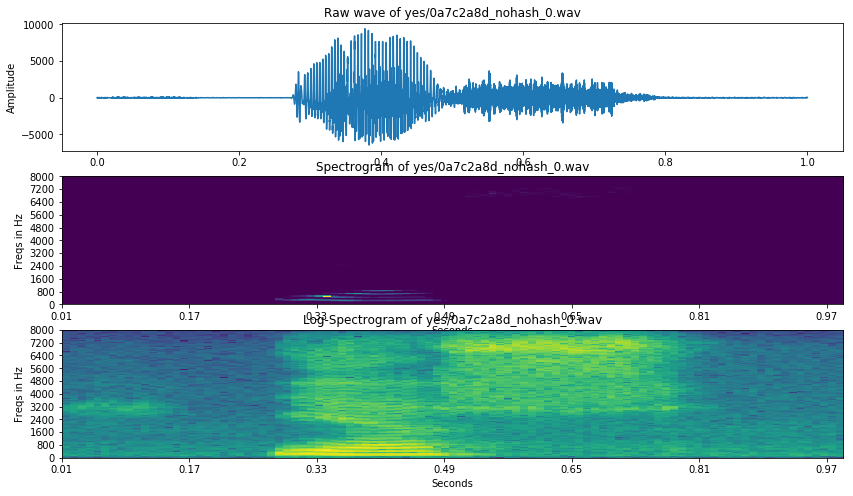

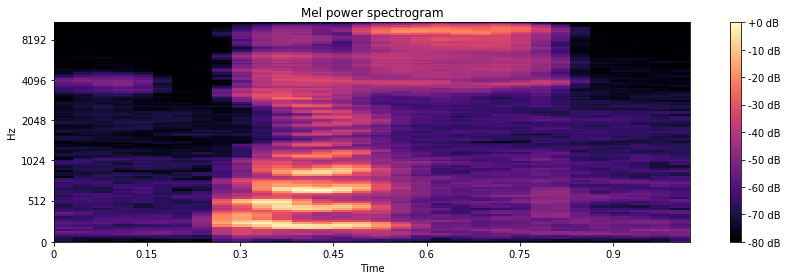

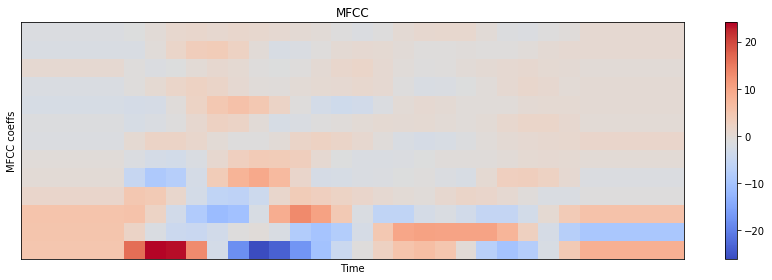

In [4]:
# 음성 파형 시각화
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(311)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(sample),sample_rate), sample)

# 스펙트로그램 시각화
# 음성 파형을 스펙트로그램으로 변화하여 시각화한 그림. 값의 분포가 적절하지 않아, 일부 영역만 색상이 나타남.
# 시각화된 스펙트로그램을 보면, 낮은 음역과 높은 음역에서의 값의 분포가 불균형하여, 0.33초 ~ 0.45초 부근에서만 정보가 담겨있음.
freqs, times, spectrogram = specgram(sample, sample_rate)
ax2 = fig.add_subplot(312)
ax2.imshow(spectrogram.T,
           aspect = 'auto',
          origin = 'lower',
          extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

# log-스펙트로그램 시각화
# 스펙트로그램으로 추출된 값들에서, 인간의 목소리를 구별하는데 유의미한 낮은 주파수 영역을 강조하고 높은 주파수 영역을 상대적으로 덜 강조하도록 
# log-scale로 스펙트로그램 값을 조절.
freqs, times, spectrogram = log_specgram(sample, sample_rate)
ax3 = fig.add_subplot(313)
ax3.imshow(spectrogram.T,
           aspect = 'auto',
          origin = 'lower',
          extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax3.set_yticks(freqs[::16])
ax3.set_xticks(times[::16])
ax3.set_title('Log-Spectrogram of ' + filename)
ax3.set_ylabel('Freqs in Hz')
ax3.set_xlabel('Seconds')

# mel-스펙트로그램 시각화
# librosa 라이브러리의melspectrigram()와 로그 함수를 씌워 주파수별 값의 분포를 변환.
# log-스펙트로그램과 비교하면, 비슷한 시간대에 주파수가 강조되지만, 패턴이 미세하게 다름을 확인할 수 있음.
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S,
                        sr = sample_rate,
                        x_axis ='time',
                        y_axis = 'mel')
plt.title('Mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# MFCC 시각화
# mel-스펙트로그램 값에 다시 한 번 연산을 하여, 상위 레벨 변수를 추출
plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()